Programa de Pós-graduação em Ciências da Computação (PPCIC)

Centro Federal de Educação Tecnológica Celso Suckow da Fonseca – (CEFET/RJ)

Disciplina: Aprendizado de Máquina

Prof.: Eduardo Bezerra

Aluna: Érica Carneiro


#1 Aprendizado de Comitês


O aprendizado de comitês faz uso de diversas abordagens quem combinam técnicas de aprendizado supervisionado em um modelo preditivo. Seu princiapal objetivo é construir uma coleção de preditores que, juntos, são capazaes de executar uma predição melhor do que cada um deles separadamente. Além disso, visa diminuir a variância e/ou viés, melhorando a força preditiva. O método pode, ainda, ser aplicado às tarefas de classificaçãoe de regressão. 

Além disso, é importante ressaltar que, em um comitê que haja diversidade entre os componentes. Algumas abordagens que ajudam a incrementar essa diversidade são: 

*   O uso de diferentes parâmetros de treinamento para a mesma família de classificadores;
*   O uso de diferentes parâmetros de treinamento para a mesma família de classificadores;
* O uso de diferentes parâmetros de treinamento para a mesma família de classificadores;
* O uso de diferentes tipos de classificadores;
* Uso de diferentes conjuntos de características;
* Manipulação do conjunto de treinamento.



## Importação de bibliotecas das principais bibliotecas


Para a correta execução das funções de predição em aprendizado de máquina, o uso de algumas bibliotecas em Python são de grande para o auxílio e execução dos algoritmo presentes neste trabalhos. Ressalta-se que optou-se por executar todas as funções dentro do presente documento de modo a facilitar a visualilzação, aprendizado e possíveis inferências que as mesmas poderiam trazer ao leitor e autor do presente documento. 

Importação de bibliotecas necessária para aprendizado de máquina e abordagem de aprendicado de comitês:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


Carregamento de dados

In [ ]:
data1 = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
dados1 = pd.read_table(data1,
                      sep='\t',
                      header=None,
                      names=['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE'])
X = dados1.iloc[:, 0:-1].values
y = dados1.iloc[:, -1:].values

dados1.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
1,0,360,0,313,9,52,0,25,48,0,1
0,0,350,1,468,10,65,0,33,6,0,1
0,0,1100,0,829,9,125,0,56,48,0,1
0,0,3000,0,552,12,76,1,31,60,0,1
1,0,1000,0,809,12,111,0,24,7,0,1


In [ ]:
data2 = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
dados2 = pd.read_table(data1,
                      sep='\t',
                      header=None,
                      names=['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE'])
X_test = dados2.iloc[:, 0:-1].values
y_test = dados2.iloc[:, -1:].values

dados2.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
1,0,360,0,313,9,52,0,25,48,0,1
0,0,350,1,468,10,65,0,33,6,0,1
0,0,1100,0,829,9,125,0,56,48,0,1
0,0,3000,0,552,12,76,1,31,60,0,1
1,0,1000,0,809,12,111,0,24,7,0,1


Divisão aleatória da matriz de dados e so vetor de rótulo correspondente em um X_train, X_test, X_val, y_train, y_test, y_val com o Sklearn.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2)

A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina: eles podem se comportar inadequadamente caso seus recursos individuais não se assemelhem aos dados distribuídos (por exemplo, Gaussiano com média 0 e variação unitária).

Isso ocorre pois muitos elementos usados ​​na função de um algoritmo de aprendizagem (como o kernel RBF de Support Vector Machines, L1 e L2 de modelos lineares) assumem que todos os recursos estão centralizados em torno de 0 e têm variância na mesma ordem. Caso uma característica tenha uma variância maior do que as outras, ela pode dominar a função, tornando estimador incapaz de aprender com outras características.


Assim, utiliza-se a função StandardScaler()da Scikit Learn  fim de padronizar os recursos e remover a média, escalonando-as para a variação da unidade. Desta forma, a pontuação padrão de uma amostra x é calculada como:

    z = (x - u) / s

onde u é a média das amostras de treinamento ou zero se with_mean = False, es é o desvio padrão das amostras de treinamento ou um se with_std = False.

A centralização e o dimensionamento acontecem independentemente em cada recurso, computando as estatísticas relevantes nas amostras do conjunto de treinamento. A média e o desvio padrão são, então, armazenados para serem usados ​​em dados posteriores na transformação.


Este scaler também pode ser aplicado a matrizes CSR ou CSC esparsas passando with_mean = False para evitar quebrar a estrutura de esparsidade dos dados.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##1.1 Boosting

Boosting é um método que mescla diferentes tipos de previsões que diminui os viés, mas não a variância. Nele, um conjunto sequencial ajusta iterativamente o peso da observação de acordo com a última classificação. Caso uma observação seja classificada incorretamente, seu peso aumentará. O termo ‘Boosting’ em uma linguagem leiga, refere-se a algoritmos que convertem um modelo de treino fraco em outro mais forte. Assim, ele diminui o erro de polarização e constrói modelos preditivos mais confiáveis.

Os pontos de dados previstos incorretamente em cada iteração são identificados e seus pesos aumentados. O algoritmo de Boosting aloca pesos para cada modelo resultante durante o treinamento. Um aprendizado com bons resultados de previsão de dados de treinamento receberá um peso maior. Ao avaliar um novo modelo de treino, o Boosting acompanhará seus erros.

Importanto a AdaBoostClassifier do Scikit Learn.


Trata-se de um metaestimador que ajusta um classificador no conjunto de dados original e, em seguida, adequa as cópias adicionais do classificador no mesmo conjunto de dados. É também responsável por implementar o algoritmo conhecido como AdaBoost-SAMME. Assim, os pesos das instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem nos casos difíceis.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier



Construção de um classificador otimizado a partir do conjunto de treinamento (X, y) e predição de X.

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)
#y_pred = clf.predict(X_val_scaled)
y_pred = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.902

Configurando a dimensão do array de treinos.

In [ ]:
train_sizes = np.arange(0.1,1,0.1)

Aplica-se a função learning_curve do Sckit Learn.

Com ela, é possível determinar um treinamento por meio da validação cruzada, bem como as pontuações de teste para diferentes tamanhos de conjuntos de treinamento.

Um gerador de validação cruzada divide todo o conjunto de dados k vezes nos dados de treinamento e teste. Subconjuntos do conjunto de treinamento com tamanhos variados serão usados ​​para treinar o estimador e uma pontuação para cada tamanho de subconjunto de treinamento e o conjunto de teste será calculado. Posteriormente, será calculada a média das pontuações de todas as k corridas para cada tamanho de subconjunto de treinamento.

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = clf,
                                                                X = X_train_scaled,y = y_train, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Aplicação da função para plot da curva de validação.

Mean training scores

 96     1.000000
192    0.995833
288    0.965972
384    0.945312
480    0.936667
576    0.925694
672    0.922321
768    0.918750
864    0.917824
dtype: float64

 --------------------

Mean validation scores

 96     0.765000
192    0.849167
288    0.863333
384    0.865833
480    0.870833
576    0.867500
672    0.868333
768    0.875000
864    0.877500
dtype: float64


(0.78, 1.03)

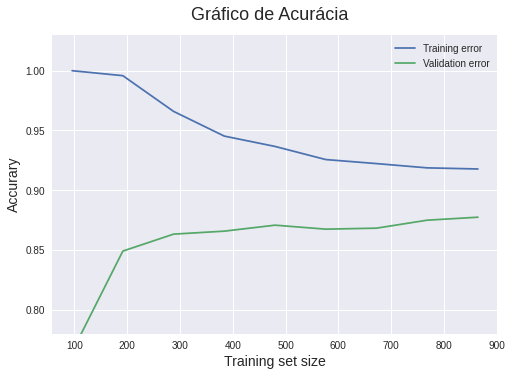

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#plt.plot(num, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accurary', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Gráfico de Acurácia  ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.78,1.03)

Chama-se a função classification_report.


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       785
           1       0.94      0.85      0.89       715

    accuracy                           0.90      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



Acima, saída com o relatório em texto apresentando as principais métricas de classificação.

##GradientBoostingClassifier 

A GradientBoostingClassifier
 constrói um modelo aditivo avançado, permitindo a otimização de funções de perda diferenciáveis ​​arbitrárias. Em cada estágio, n_classes_ árvores de regressão são ajustadas no gradiente negativo da função de perda de desvio binomial ou multinomial. A classificação binária é um caso especial em que apenas uma única árvore de regressão é induzida.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


Primeiramente, ajusta-se o modelo de aumento de gradiente. Em seguida, prediz-se a classe de X.

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train_scaled, y_train)
#y_pred = clf.predict(X_val_scaled)
y_pred = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9313333333333333

Aplica-se a função learning_curve do Sckit Learn.

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = clf,
                                                                X = X_train_scaled,y = y_train, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Aplicação da função para plot da curva de validação.

Mean training scores

 96     1.000000
192    1.000000
288    0.997222
384    0.977604
480    0.971250
576    0.955903
672    0.951786
768    0.946875
864    0.943287
dtype: float64

 --------------------

Mean validation scores

 96     0.854167
192    0.883333
288    0.891667
384    0.898333
480    0.894167
576    0.901667
672    0.900833
768    0.897500
864    0.900000
dtype: float64


(0.78, 1.03)

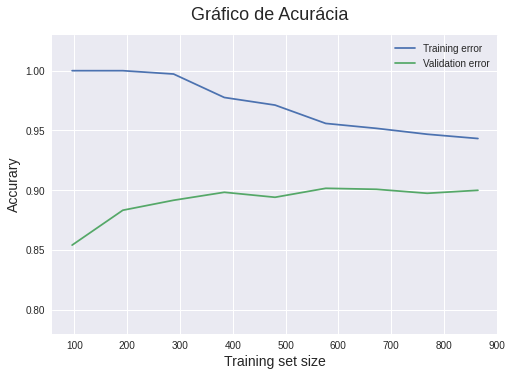

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#plt.plot(num, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accurary', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Gráfico de Acurácia  ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.78,1.03)

Chama-se a função classification_report.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       785
           1       0.98      0.87      0.92       715

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500



Acima, saída com o relatório em texto apresentando as principais métricas de classificação do GradienBoost.

##1.2 Bagging

Trata-de um acrônimo para ‘Bootstrap Aggregation. Nele, um modelo homogêneo de *"weak leraners"* aprendem uns com os outros de forma independente em paralelo, combinando resultados a fim de determinar a média do modelo.

O Bagging costuma ser usado para diminuir a variância no modelo de previsão, adaptando-se a diferentes "weak leraners" independentemente uns dos outros, permitindo treiná-los simultaneamente. Além disso, gera dados adicionais para treinamento do conjunto de dados, obtidos por amostragem aleatória com substituição do conjunto de dados original. Cada elemento em Bagging é igualmente provável que apareça em um novo conjunto de dados.

Esses vários conjuntos de dados são usados ​​para treinar vários modelos em paralelo. A média de todas as previsões de diferentes modelos de conjunto é calculada. Assim, a maioria de votos obtida no mecanismo de votação é considerada quando a classificação é feita. É importante ressaltar, mais uma vez, que o Bagging diminui a variância e ajusta a previsão para um resultado esperado.

Importando as funções e bibliotecas necessárias do Scikit Learn.

É importante ressaltar o uso de SVC. Devido à sua maior flexibilidade na escolha das funções de penalidades e perdas, seu uso é mais adequado ao Bagging, que executa vários treinamentos em "weak learners". 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

Primeiramente, constrói-se um conjunto de avaliadores de Bagging a partir do treinamento pelo comando clf.fit. Posteriormente, prevê-se a classe de X por meio de clf.predict. Por fim, o comando clf.score retorna a precisão média nos dados de teste e rótulos fornecidos.

In [ ]:
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
clf.fit(X_train_scaled, y_train)
#y_pred = clf.predict(X_val_scaled)
y_pred = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.886

Aplica-se a função learning_curve do Sckit Learn.

Aplicação da função para plot da curva de validação.

Chama-se a função classification_report.

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = clf,
                                                                X = X_train_scaled,y = y_train, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Aplicação da função para plot da curva de validação.

Mean training scores

 96     0.910417
192    0.935417
288    0.897222
384    0.896875
480    0.893750
576    0.897917
672    0.897917
768    0.895312
864    0.894676
dtype: float64

 --------------------

Mean validation scores

 96     0.826667
192    0.856667
288    0.866667
384    0.863333
480    0.867500
576    0.876667
672    0.877500
768    0.880000
864    0.884167
dtype: float64


(0.78, 1.03)

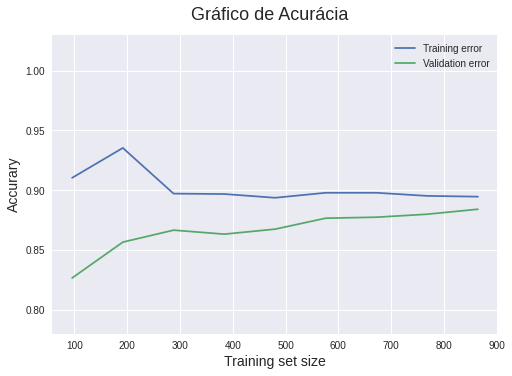

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#plt.plot(num, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accurary', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Gráfico de Acurácia  ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.78,1.03)

Chama-se a função classification_report.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       785
           1       0.98      0.78      0.87       715

    accuracy                           0.89      1500
   macro avg       0.90      0.88      0.88      1500
weighted avg       0.90      0.89      0.88      1500



Acima, saída com o relatório em texto apresentando as principais métricas de classificação do Bagging

##Random Forest

Random Forest é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados, utilizando a média para melhorar a precisão preditiva e o sobreajuste de controle. Como é possível inferir pela descrição acima, o Random Forest é um exemplo de Bagging.

Importando RandomForestClassifier de Scikit Learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf.fit constrói uma floresta de árvores a partir do conjunto de treinamento (X, y). Posteriormente, prediz-se a classe de X (clf.predict). E,finalmente, o comando clf.score retorna a precisão média nos dados de teste e rótulos fornecidos.

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_scaled, y_train)
#y_pred = clf.predict(X_val_scaled)
y_pred = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.89

Aplica-se a função learning_curve do Sckit Learn.

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = clf,
                                                                X = X_train_scaled,y = y_train, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Aplicação da função para plot da curva de validação.

Mean training scores

 96     0.891667
192    0.906250
288    0.891667
384    0.891146
480    0.903333
576    0.891319
672    0.894940
768    0.891406
864    0.891435
dtype: float64

 --------------------

Mean validation scores

 96     0.874167
192    0.879167
288    0.879167
384    0.874167
480    0.888333
576    0.888333
672    0.880833
768    0.881667
864    0.885000
dtype: float64


(0.78, 1.03)

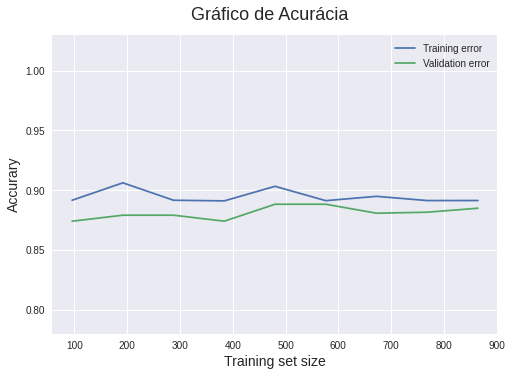

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#plt.plot(num, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accurary', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Gráfico de Acurácia  ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.78,1.03)

Chama-se a função classification_report.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       785
           1       0.95      0.81      0.88       715

    accuracy                           0.89      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.90      0.89      0.89      1500



Acima, saída com o relatório em texto apresentando as principais métricas de classificação do Random Forest.

# 2 Sistemas de Recomendação

Trata-se de uma aplicação de aprendizado de máquina amplamente utilizada em empresas como Netflix, Amazon, The ?New York Time, Google, dentre outras. O sistema de recomendação utiliza a modelagem de dados e a aplicação de algoritmos de modo a tentar prever a nota (*rating*) ou mesmo a preferência de um usuário a um determinado item ou produto. São classificados conforme o tipo de algoritmo aplicado, cujos exemplos principais são: Filtragem colaborativa, filtragem baseada em conteúdo e sistemas híbridos.

Importando bibliotecas necessárias

In [ ]:
import requests
import scipy.io as spi
import scipy.optimize as opt
import scipy.io
import scipy.io as sio
import scipy.optimize as opt

In [ ]:
from matplotlib import use, cm
use('TkAgg')
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import minimize

Carregamento de dados:

In [ ]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t3/datasets/ex8_movies.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex8_movies.mat', 'wb').write(r.content)

data3 = scipy.io.loadmat('ex8_movies.mat')
Y = data3['Y']
R = data3['R'].astype(bool)




É importante observar que Y é uma matriz de ordem 1682x943, com avaliações (1-5) de 1682 filmes sobre 943 usuários. Já R é uma matriz 1682x943, em que:
R(i,j) = 1 se e somente se o usuário j avaliou o filme i.

Para fins de notação, convenciona-se:

* nu = quantidade de usuários 
* nm = quantidade de filmes 
* m(j) = quantidade de filmes avaliados pelo usuário j 
* r(i,j) = 1, se usuário j avaliou o filme i 
* y(i,j) = nota atribuida pelo usuário j ao filme i (definido apenas se r(i,j) =1)

A matriz possibilita analisar as estatísticas, como a avaliação média

In [ ]:

print('Avaliação média para filme 1 (Toy Story): %f / 5' % np.mean(Y[0, R[0, :]]))

Avaliação média para filme 1 (Toy Story): 3.878319 / 5


Uma vez que usuários fazem poucas avaliações, a matriz cotuma ser esparsa. É possível verificar ilustrativamente por meio dos comandos abaixo.

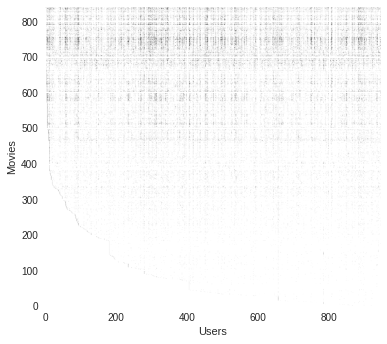

In [ ]:

plt.figure()
plt.imshow(Y, aspect='equal', origin='upper', extent=(0, Y.shape[1], 0, Y.shape[0]/2.0))
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()


Carregamento de dados:

In [ ]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t3/datasets/ex8_movieParams.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex8_movieParams.mat', 'wb').write(r.content)

data_params = scipy.io.loadmat('ex8_movieParams.mat')

X = data_params['X']
Theta = data_params['Theta']
num_users = data_params['num_users']
num_movies = data_params['num_movies']
num_features = data_params['num_features']



Cria-se a função cofi_cost_func

Os comentários serão inseridos no código a fim de facilitar seu entendimento.

In [ ]:
import numpy as np


def cofi_cost_func(params, Y, R, num_users, num_movies, num_features, Lambda):

    # Obtem as matrizes X e Theta a partir dos params
    X = np.array(params[:num_movies*num_features]).reshape(num_features, num_movies).T.copy()
    Theta = np.array(params[num_movies*num_features:]).reshape(num_features, num_users).T.copy()


    # Voce deve retornar os seguintes valores corretamente
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # ====================== SEU CODIGO AQUI ======================
    # Instrucoes: calcular a funcao de custo regularizada e gradiente
    # para a filtragem colaborativa. Concretamente, você deve primeiro
    # implementar a funcao de custo. Depois disso, voce deve implementar o
    # gradiente. 
    #
    # Notas: 
    # X - num_movies x num_features: matriz das caracteristicas dos filmes
    # Theta - num_users x num_features: matriz das caracteristicas dos usuarios
    # Y - num_movies x num_users: matriz de classificacoes de filmes por usuarios
    # R - num_movies x num_users: matriz, onde R (i, j) = 1 se o i-esimo filme
    #       foi avaliado pelo j-esimo usuario
    #
    # =============================================================

    # =============================================================
    #Função de custo baseada na equação da seção 2.1.1
    # =============================================================
    J = (1/2.) * np.sum((np.power(np.dot(X,Theta.T) - Y,2)) * R)

    # =======================================================================
    #Gradiente da filtragem colaborativa baseados nas equações da seção 2.1.2
    # =======================================================================

    # Gradiente para X e Theta:
    # =============================================================
    # X_grad - num_movies x num_features matrix, contendo as
    #   derivadas parciais com relacao a cada elemento de X
    X_grad = np.dot((np.dot(X, Theta.T) - Y ) * R, Theta)
    
    #Linha adicionada apenas para conferir se a matriz gerada
    #tem as dimensões corretas. DESATIVADA APÓS VALIDAÇÃO
    #RESULTADO VALIDADO: (5, 3)
    #print(X_grad, X_grad.shape)
    

    # Theta_grad - num_users x num_features: matriz, contendo as
    #   derivadas parciais com relacao a cada elemento de Theta
    Theta_grad = np.dot(((np.dot(X, Theta.T) - Y ) * R).T, X)

    #Linha adicionada apenas para conferir se a matriz gerada
    #tem as dimensões corretas. DESATIVADA APÓS VALIDAÇÃO
    #RESULTADO VALIDADO: (4, 3)
    #print(Theta_grad, Theta_grad.shape)

    # =============================================================
    #Gradiente para ambos os cojuntos em um único vetor
    # =============================================================
    grad = np.hstack((X_grad.T.flatten(),Theta_grad.T.flatten()))

    return J, grad

Adiciona-se informações complementares do conjunto de dados

In [ ]:


X = data_params['X']
Theta = data_params['Theta']
num_users = data_params['num_users']
num_movies = data_params['num_movies']
num_features = data_params['num_features']

print(f'Usuários: {num_users}\nFilmes: {num_movies}\nAtributos: {num_features}')



Usuários: [[943]]
Filmes: [[1682]]
Atributos: [[10]]


Reduz o conjunto de dados para que a execucao seja mais rapida

In [ ]:

num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

Print para verificação da dimensão das matrizes:

In [ ]:
print('Dimensões das matrizes X, Theta, Y e R:')
print(X.shape, Theta.shape, Y.shape, R.shape)

Dimensões das matrizes X, Theta, Y e R:
(5, 3) (4, 3) (5, 4) (5, 4)


In [ ]:
J, grad = cofi_cost_func(np.hstack((X.T.flatten(),
                                    Theta.T.flatten())),
                         Y, R, num_users, num_movies,
                         num_features, 0)

In [ ]:
print('Custo computado usando parâmetros pré-treinados: %f \n(valor deve ser próximo de 22.22)' % J)

Custo computado usando parâmetros pré-treinados: 22.224604 
(valor deve ser próximo de 22.22)


###2.1.2 Gradiente de filtragem colaborativa

A mesma função supracitada, porém com grad.

In [ ]:
grad

array([ -2.52899165,  -0.56819597,  -0.83240713,  -0.38358278,
        -0.80378006,   7.57570308,   3.35265031,   4.91163297,
         2.26333698,   4.74271842,  -1.89979026,  -0.52339845,
        -0.76677878,  -0.35334048,  -0.74040871, -10.5680202 ,
        -3.05099006,   0.        ,   0.        ,   4.62776019,
         1.16441367,   0.        ,   0.        ,  -7.16004443,
        -3.47410789,   0.        ,   0.        ])

Conferência de valores de X e matriz com os novos valores obtidos com grad.


In [ ]:
  X_grad = np.dot(( np.dot(X, Theta.T) - Y ) * R, Theta)
  print('CONFERÊNCIA - X_grad: valores e shape:')
  print(X_grad, X_grad.shape, sep='\n')


CONFERÊNCIA - X_grad: valores e shape:
[[-2.52899165  7.57570308 -1.89979026]
 [-0.56819597  3.35265031 -0.52339845]
 [-0.83240713  4.91163297 -0.76677878]
 [-0.38358278  2.26333698 -0.35334048]
 [-0.80378006  4.74271842 -0.74040871]]
(5, 3)


Conferência de valores de Theta e matriz com os novos valores obtidos com grad.

In [ ]:
 Theta_grad = np.dot((( np.dot(X, Theta.T) - Y ) * R).T, X)
 print('-'*50)
 print('CONFERÊNCIA - Theta_grad: valores e shape:')
 print(Theta_grad, Theta_grad.shape, sep='\n')

--------------------------------------------------
CONFERÊNCIA - Theta_grad: valores e shape:
[[-10.5680202    4.62776019  -7.16004443]
 [ -3.05099006   1.16441367  -3.47410789]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
(4, 3)


##2.2 Aprendizado de Recomendações para Filmes

Carregamento dos dados com a função load_movie_list.

In [ ]:
import io


def load_movie_list():
    """
    reads the fixed movie list in movie.txt
    and returns a cell array of the words in movieList.
    """

    ## Read the fixed movieulary list
    with io.open('/content/movie_ids.txt', encoding='ISO-8859-1') as f:

        # Store all movies in cell array movie{}
        n = 1690  # Total number of movies 

        movieList = []
        for i in range(n):
            # Read line
            line = f.readline()
            # Word Index (can ignore since it will be = i)
            str = line.split()
            # Actual Word
            movieList.append(' '.join(str[1:]).strip())
        return movieList

In [ ]:
movieList = load_movie_list()

Visualização dos primeiros cinco itens da lista de filmes presente na carga de dados.

In [ ]:
movieList[:5]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)']

Inicialização do vetor de avaliacoes do novo usuário

In [ ]:

my_ratings = np.zeros(1690)

Verificação do arquivo movie_idx.txt a fim de encontrar o id de cada filme
Por exemplo, Toy Story (1995) tem ID 1; sendo assim, para atribuir avaliacao "3", é necessário que o comando my_ratings seja igual a 3 a fim de classificar o filme com essa pontuação.

In [ ]:

my_ratings[0] = 3

Ou suponha que voce nao gostou de Silence of the Lambs (1991):

In [ ]:

my_ratings[97] = 4

Foi efetuada uma tentativa de alteraçaõ do dataset original inlcuindo novos filmes. Para tanto, modificou-se também o valor de n na função para 1689, bem como o valor do vetor de avaliação do usuário. Por algum motivo, ainda que o código tenha processado, uma lacuna sem avaliação apresentou-se na última linha da saída.

In [ ]:
# Abaixo, sao definidas as avaliacoes para outros filmes:
my_ratings[1683] = 5 #Good bye, Lenin!
my_ratings[1684] = 5 #Petz
my_ratings[168] = 4 #Monty Python and the Holy Grail
my_ratings[1685] = 4 #Volver
my_ratings[1686] = 3 #Matrix
my_ratings[559] = 3 #Interview with the Vampire: The Vampire Chronicles)
my_ratings[1687] = 4 #Jawbreaker
my_ratings[1688] = 1 #Sharknado
my_ratings[154] = 4 #Monty Python´s Life of Brian
my_ratings[1689] = 4 #Dark Waters


In [ ]:
print('Avaliacoes do novo usuario:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))


Avaliacoes do novo usuario:
	Avaliou 3 para Toy Story (1995)
	Avaliou 4 para Silence of the Lambs, The (1991)
	Avaliou 4 para Dirty Dancing (1987)
	Avaliou 4 para Wrong Trousers, The (1993)
	Avaliou 3 para Kid in King Arthur's Court, A (1995)
	Avaliou 5 para Petz (2016)
	Avaliou 5 para Volver (2006)
	Avaliou 4 para Matrix (1999)
	Avaliou 3 para Jawbreaker (1999)
	Avaliou 4 para Sharknado (2013)
	Avaliou 1 para Dark Waters (2019)
	Avaliou 4 para 


print para verificar o tamanho dos vetores.

In [ ]:
print(i)

1689


Devido aos problemas obtidos entre vetores e itens da lista, optou-se por refazer a aplicação com o dataset e função originais, sem alterações.

In [ ]:
import io


def load_movie_list():
    """
    reads the fixed movie list in movie.txt
    and returns a cell array of the words in movieList.
    """

    ## Read the fixed movieulary list
    with io.open('/content/movie_ids1.txt', encoding='ISO-8859-1') as f:

        # Store all movies in cell array movie{}
        n = 1682  # Total number of movies 

        movieList = []
        for i in range(n):
            # Read line
            line = f.readline()
            # Word Index (can ignore since it will be = i)
            str = line.split()
            # Actual Word
            movieList.append(' '.join(str[1:]).strip())
        return movieList

In [ ]:
movieList = load_movie_list()

In [ ]:
movieList[:5]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)']

In [ ]:

my_ratings = np.zeros(1682)

In [ ]:


#Toy Story (1995) tem ID 1; atribuir avaliação "3":
my_ratings[0] = 3



In [ ]:
#de Silence of the Lambs (1991); atribuir avaliação "5":
my_ratings[97] = 5

In [ ]:
#Avaliacoes para outros filmes:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

In [ ]:
print('Avaliacoes do novo usuario:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))

Avaliacoes do novo usuario:
	Avaliou 3 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 para Outbreak (1995)
	Avaliou 5 para Shawshank Redemption, The (1994)
	Avaliou 3 para While You Were Sleeping (1995)
	Avaliou 5 para Forrest Gump (1994)
	Avaliou 5 para Silence of the Lambs, The (1991)
	Avaliou 4 para Alien (1979)
	Avaliou 5 para Die Hard 2 (1990)
	Avaliou 5 para Sphere (1998)


### Aprendizado para recomendação de filmes



Carregamento de dados.

Novamente, Y é uma matriz de ordem 1682x943, com avaliações (1-5) de 1682 filmes sobre 943 usuários. Já R é uma matriz 1682x943, em que: R(i,j) = 1 se e somente se o usuário j avaliou o filme i.

In [ ]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t3/datasets/ex8_movies.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex8_movies.mat', 'wb').write(r.content)

data3 = scipy.io.loadmat('ex8_movies.mat')
Y = data3['Y']
R = data3['R'].astype(bool)


Função normalize_ratings
Comentários foram adicionados ao código a fim de facilitar seu entendimento.

In [ ]:
import numpy as np


def normalize_ratings(Y, R):
    """normaliza Y de tal forma que os filmes possuam uma avaliacao de 0 em media,
    and returns the mean rating in Ymean.
    """

    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)

    for i in range(n):
        idx = (R[i,:]==1).nonzero()[0]
        if len(idx):
            Ymean[i] = np.mean(Y[i, idx])
            Ynorm[i, idx] = Y[i, idx] - Ymean[i]
        else:
            Ymean[i] = 0.0
            Ynorm[i,idx] = 0.0

    return Ynorm, Ymean

Importando função minimize de scipy.

In [ ]:
from scipy.optimize import minimize

Normalização das avaliacoes originais

In [ ]:

Ynorm, Ymean = normalize_ratings(Y, R)



Fator de regularizacao

In [ ]:

Lambda = 10


Criação das configurações das funções de custo e gradiente com base em cofi_cost_func.

In [ ]:
costFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[0]
gradFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[1]

Treinamento do modelo: Aplica-se a função minimize para otimização do vetor theta e cálculo do custo.

In [ ]:
result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc,
                  options={'disp': True, 'maxiter': 1000.0})

theta = result.x
cost = result.fun



         Current function value: 21282.171900
         Iterations: 1000
         Function evaluations: 1476
         Gradient evaluations: 1476


In [ ]:
print('Aprendizado do Sistema de Recomendação finalizado.')

Aprendizado do Sistema de Recomendação finalizado.


In [ ]:
print(f'Custo computado no treinamento: {cost:.2f}')

Custo computado no treinamento: 21282.17


Realização de recomendações:
Após o treinamento do modelo, e possível realizar recomendações computando a matriz de predições.

Computação da matriz de predições.

In [ ]:
p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean

In [ ]:
movieList = load_movie_list()

Ordenação de predições em ordem decrescente

In [ ]:

pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])
post = pre[pre[:,1].argsort()[::-1]]
r = post[:,1]
ix = post[:,0]

Print para visualização das principais recomendações na sequência da classificação dos filmes.

In [ ]:
print('\nRecomendacoes principais:')
for i in range(10):
    j = int(ix[i])
    print('\tPrevisão de avaliacao %.1f para %s' % (my_predictions[j], movieList[j]))


Recomendacoes principais:
	Previsão de avaliacao 7.1 para Schindler's List (1993)
	Previsão de avaliacao 7.1 para As Good As It Gets (1997)
	Previsão de avaliacao 7.0 para Maltese Falcon, The (1941)
	Previsão de avaliacao 6.9 para Shawshank Redemption, The (1994)
	Previsão de avaliacao 6.9 para Princess Bride, The (1987)
	Previsão de avaliacao 6.8 para Paths of Glory (1957)
	Previsão de avaliacao 6.8 para Vertigo (1958)
	Previsão de avaliacao 6.7 para Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
	Previsão de avaliacao 6.7 para One Flew Over the Cuckoo's Nest (1975)
	Previsão de avaliacao 6.7 para Rear Window (1954)


In [ ]:
print('\nAvaliacoes originais fornecidas:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))


Avaliacoes originais fornecidas:
	Avaliou 3 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 para Outbreak (1995)
	Avaliou 5 para Shawshank Redemption, The (1994)
	Avaliou 3 para While You Were Sleeping (1995)
	Avaliou 5 para Forrest Gump (1994)
	Avaliou 5 para Silence of the Lambs, The (1991)
	Avaliou 4 para Alien (1979)
	Avaliou 5 para Die Hard 2 (1990)
	Avaliou 5 para Sphere (1998)


# 3 Redes Neurais Artificiais

Redes Neurais Artificiais são técnicas computacionais cujo modelo matemático é inspirado na estrutura neural de organismos inteligentes. São compostas por várias unidades de processamento conectadas por canais de comunicação associados a um determinado peso. 

Tais unidades executam operações apenas em seus dados locais, i.e, entradas recebidas por suas conexões. É importante ressaltar que as interações entre as unidades de processamento da rede neural são responsáveis pos seu comportamento inteligente.

Segundo a proposta de McCullock e Pitts em 1943, operação de uma unidade de processamento, pode ser apresentada conforme a seguir:

  Sinais apresentados na entrada;
  Cada sinal é multiplicado por um número, ou peso, indicando sua influência na saída da unidade;
  Executa-se a soma ponderada dos sinais produzindo nível de atividade;
  Caso tal nível exceda determinado limite (threshold), a unidade produzirá uma determinada resposta de saída.

## 3.1 Redes MLP

Imortação de bibliotecas

In [ ]:
import numpy as np
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV
from timeit import default_timer as timer
from sklearn.metrics import classification_report
from sklearn import metrics 
import seaborn as sns

Carregamento de dados:

In [ ]:
import h5py


def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(train_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
    
    return test_set_x_orig, test_set_y_orig, train_set_y_orig, test_set_y_orig, classess

Carregamento de dados:

In [ ]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']


#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)


#Carga do conjunto de teste
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

Checagem do conjunto de dados

In [ ]:

print(data_train.head(),
      data_test.head(),
      sep='\n\n')

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     1     0    360      0   313  ...    0     25     48        0       1
1     0     0    350      1   468  ...    0     33      6        0       1
2     0     0   1100      0   829  ...    0     56     48        0       1
3     0     0   3000      0   552  ...    1     31     60        0       1
4     1     0   1000      0   809  ...    0     24      7        0       1

[5 rows x 12 columns]

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     0     2    500      1   618  ...    0     36      6        0       0
1     1     0    813      0   552  ...    0     43     48      119       1
2     3     0    350      0   488  ...    0     43      0        0       1
3     1     0   1530      0   381  ...    0     28     48        0       1
4     0     0    688      1   396  ...    0     49     72        0       1

[5 rows x 12 columns]


Resumo estatístico dos dados

In [ ]:

data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


Confere-se e visualiza-se valores da variável Estado Civil (ESCT)

In [ ]:



print(data_train['ESCT'].head(5),
      data_train['ESCT'].describe(),
      sep='\n\n')


print('\nValores possíveis do atributo estado civil:')
set(data_train['ESCT'])



0    1
1    0
2    0
3    0
4    1
Name: ESCT, dtype: int64

count    1500.000000
mean        0.512000
std         0.659909
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: ESCT, dtype: float64

Valores possíveis do atributo estado civil:


{0, 1, 2, 3}

O método get_dummies da biblioteca pandas foi utitilizado para simplificar a transformação do conjunto de dados.

In [ ]:



data_train_ = pd.get_dummies(data=data_train,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_train_.head()



,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,1,0,0
1,0,350,1,468,10,65,0,33,6,0,1,0,0,0
2,0,1100,0,829,9,125,0,56,48,0,1,0,0,0
3,0,3000,0,552,12,76,1,31,60,0,1,0,0,0
4,0,1000,0,809,12,111,0,24,7,0,1,1,0,0


In [ ]:


data_test_ = pd.get_dummies(data=data_test,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_test_.head()



,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,2,500,1,618,10,85,0,36,6,0,0,0,0,0
1,0,813,0,552,4,119,0,43,48,119,1,1,0,0
2,0,350,0,488,12,66,0,43,0,0,1,0,0,1
3,0,1530,0,381,1,398,0,28,48,0,1,1,0,0
4,0,688,1,396,10,60,0,49,72,0,1,0,0,0


Após a transformação, atributos e classes alvo serão separados os atributosem novas variáveis para processamento pelos algoritmos desejados.

In [ ]:
#Separação da variável alvo não muda
##=======================================

#Transoformação dos atributos e da classe alvo em matrizes
y_train_ = np.array(data_train['CLASSE'])

#Transformação dos atributos e da classe alvo em matrizes
y_test = np.array(data_test['CLASSE'])

#Checagem da matriz
print(y_train_[:10],
      y_test[:10],
      sep='\n\n')

[1 1 1 1 1 1 0 1 0 1]

[0 1 1 1 1 0 0 1 0 1]


A separação dos atributos deve observar a ordem das colunas alteradas

In [ ]:


#Recuperando nomes das colunas
atributos = list(data_train_.columns)

#Eliminação de colunas com a classe na lista de atributos
atributos.remove('CLASSE')

Uso da lista de atributos para separação do conjunto de dados:

In [ ]:


#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data_train_.loc[:, atributos])

#Transformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test_.loc[:, atributos])

Separação de treino e validação sem alteração

In [ ]:


#Separação de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_,
                                                  train_size=0.8,
                                                  random_state=31)

#Checagem das dimensões dos conjuntos após separação
print(X_train.shape, y_train.shape,
      X_val.shape, y_val.shape)

(1200, 13) (1200,) (300, 13) (300,)


Visualização dos dados carregados.

In [ ]:

print(X_train[:5],
      X_val[:5],
      X_test[:5],
      sep='\n\n')

[[   0  649    1  311    2   69    1   40    0  190    1    0    0]
 [   0  610    0  365    5   61    0   62   48   61    0    0    0]
 [   0 1500    0 1099    2  334    0   58    0  438    0    0    0]
 [   0 1000    0  471    3  176    1   45  240    0    1    0    0]
 [   0  322    1  469   10   72    1   40    0    0    0    0    0]]

[[   0  300    1  629   12   55    1   54   60  230    0    0    0]
 [   0  600    1  540   12   73    0   28    6    0    1    0    0]
 [   0  317    1  459   12   63    1   57  264    0    0    0    0]
 [   0  800    0  399    3  149    1   57    0    0    0    0    0]
 [   0 3000    0  360    1  376    0   43   48    0    1    0    0]]

[[   2  500    1  618   10   85    0   36    6    0    0    0    0]
 [   0  813    0  552    4  119    0   43   48  119    1    0    0]
 [   0  350    0  488   12   66    0   43    0    0    0    0    1]
 [   0 1530    0  381    1  398    0   28   48    0    1    0    0]
 [   0  688    1  396   10   60    0   49   

Criação do transformador para noramlização

In [ ]:

norm = StandardScaler()

#Normalização das características
X_train_ = norm.fit_transform(X_train_)
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)
X_val = norm.fit_transform(X_val)

In [ ]:
#Conjunto de treino original
X_train_ = Variable(torch.Tensor(X_train_).float())
y_train_ = Variable(torch.Tensor(y_train_).long())

#Atributos de treino e validação
X_train = Variable(torch.Tensor(X_train).float())
X_val = Variable(torch.Tensor(X_val).float())

#Classes de treino e validação
y_train = Variable(torch.Tensor(y_train).long())
y_val = Variable(torch.Tensor(y_val).long())

#Atributos e classes de teste
X_test = Variable(torch.Tensor(X_test).float())
y_test = Variable(torch.Tensor(y_test).long())

Visualização dos dados

In [ ]:

print(X_train[:5],
      X_val[:5],
      X_test[:5],
      y_train[:5],
      y_val[:5],
      y_test[:5],
      sep='\n\n')

tensor([[-0.2257, -0.3653,  1.0871, -1.0437, -1.7619, -0.5321,  2.6159, -0.1014,
         -0.5868,  1.6098,  1.2205, -0.1398, -0.1546],
        [-0.2257, -0.4116, -0.9199, -0.8172, -0.9354, -0.6606, -0.3823,  1.5753,
          0.3224,  0.2932, -0.8193, -0.1398, -0.1546],
        [-0.2257,  0.6453, -0.9199,  2.2612, -1.7619,  3.7251, -0.3823,  1.2704,
         -0.5868,  4.1410, -0.8193, -0.1398, -0.1546],
        [-0.2257,  0.0515, -0.9199, -0.3727, -1.4864,  1.1868,  2.6159,  0.2797,
          3.9596, -0.3294,  1.2205, -0.1398, -0.1546],
        [-0.2257, -0.7536,  1.0871, -0.3810,  0.4422, -0.4839,  2.6159, -0.1014,
         -0.5868, -0.3294, -0.8193, -0.1398, -0.1546]])

tensor([[-0.2032, -0.7134,  1.2419,  0.1646,  1.0275, -0.7261,  2.2913,  0.9835,
          0.5051,  2.5452, -0.8108, -0.1302, -0.1759],
        [-0.2032, -0.4445,  1.2419, -0.0869,  1.0275, -0.4524, -0.4364, -0.9440,
         -0.5332, -0.4139,  1.2333, -0.1302, -0.1759],
        [-0.2032, -0.6981,  1.2419, -0.3158,  

###3.1.2 Criação da Rede Neural MLP sem sintonização de hiperparâmetros

Redes neurais com uma ou mais camadas ocultas e npumero indeterminado de neurônios são denominadas Perceptron Multicamadas (PMC ou MLP — Multi Layer Perceptron). A camada oculta possui esse nome pois não é possível prever a saída desejada nas camadas intermediárias. O algoritmo mais utilizado em seus treinamentos o de retropropagação (Backpropagation)

 Definição da Rede Neural
  Parametros:
  * dimX int: Entradas na primeira camada (quantidade de atributos)
  * nC int:  Neurônios de saída (quantidade de classes possíveis)
  * neur int: Neurônios na camada oculta

In [ ]:
class Net(nn.Module):
  # Define nn
  def __init__(self, dimX, nC, neur):
    """
    Definição da Rede Neural
    Parametros:
    dimX int: Entradas na primeira camada (quantidade de atributos)
    nC int:  Neurônios de saída (quantidade de classes possíveis)
    neur int: Neurônios na camada oculta
    """
    super(Net, self).__init__()

    ##Camada oculta
    ##==============
    #Recebe neurônios = quantidade de atributos
    #Entrega quantidade de neurônios da camada oculta
    self.fc1 = nn.Linear(dimX, neur)

    ##Camada de saída
    ##==============
    #Recebe neurônios da camada oculta
    #Entrega quantidade de neurônios das classes possíveis
    self.fc2 = nn.Linear(neur, nC)

    #Uso da função Sigmoid para classificação binária
    self.output = nn.Sigmoid()

  def forward(self, X):
    """
    Definição do passo forward
    """
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

Ajustes manuais para definição dos hiperparâmetros. Uma técnica de sintonização de hiperparâmetros será utilizada ao final da seção. Inicialmente ela deve ser explorada  fim de encontrar a forma mais simples com suas  defnições arbitrárias.

In [ ]:


##Parâmetros baseados nos conjuntos de dados
##============================================

#Quantidade de atributos do conjunto de dados
attr_N = X_train.shape[1]

#Quantidade de classes possíveis do conjunto de dados
out_Classes = 2


"""
Ajuste manual dos parâmetros: Início lr = 0.001, 100 neurônios na camada oculta
Mantido lr e alterado número de neurônios para 200
"""
##Parâmetros definidos arbitrariamente
##============================================
NUM_NEUR = 200 #Neurônios na camada oculta
NUM_EPOCHS = 1000 #Número de épocas
LEARNING_R = 0.001 #Taxa de aprendizagem


print('Qtde. Atributos de entrada:', attr_N,
      '\nQtde. Classes alvo:', out_Classes,
      '\nNeurônios na camada oculta:', NUM_NEUR,
      '\nNúmero de épocas:', NUM_EPOCHS,
      '\nTaxa de aprendizagem:', LEARNING_R)

Qtde. Atributos de entrada: 13 
Qtde. Classes alvo: 2 
Neurônios na camada oculta: 200 
Número de épocas: 1000 
Taxa de aprendizagem: 0.001


Criação do objeto com a classe da Rede Neural e visualização da arquitetura da Rede Neural:cd

In [ ]:


net = Net(attr_N, out_Classes, NUM_NEUR)


print('Arquitetura da Rede Neural:\n', net)



Arquitetura da Rede Neural:
 Net(
  (fc1): Linear(in_features=13, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=2, bias=True)
  (output): Sigmoid()
)


Parâmetros baseados em algoritmos ou funções das bibliotecas

In [ ]:

#Entropia cruzada como função de custo - Problema de classificação
criterion = nn.CrossEntropyLoss()

#Configuração do otimizador - SGD
optimizer = torch.optim.SGD(net.parameters(), lr = LEARNING_R)

TREINAMENTO DA REDE NEURAL

In [ ]:


# loop to train the neural net
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = net(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.693609
At epoch 100 the loss is 0.692175
At epoch 200 the loss is 0.690860
At epoch 300 the loss is 0.689640
At epoch 400 the loss is 0.688506
At epoch 500 the loss is 0.687308
At epoch 600 the loss is 0.686017
At epoch 700 the loss is 0.684602
At epoch 800 the loss is 0.683117
At epoch 900 the loss is 0.681587


Verificação da forma da saída da rede

In [ ]:

out[:10]

tensor([[0.5695, 0.5000],
        [0.5544, 0.5000],
        [0.7172, 0.5000],
        [0.5247, 0.5000],
        [0.5046, 0.5000],
        [0.5242, 0.5000],
        [0.5061, 0.5366],
        [0.6188, 0.5000],
        [0.6312, 0.5119],
        [0.6279, 0.5000]], grad_fn=<SliceBackward>)

PREDIÇÃO E AVALIAÇÃO DA REDE NEURAL COM DADOS DE VALIDAÇÃO

Executando predições no conjunto de validação
Cada predição é composta por um par (predição para cada classe)

In [ ]:

predict_out = net(X_val)


#Recupera-se como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

Avaliação da Rede Neural nos dados de validação. Comandos para visualização da matriz de confusão e classification report:

In [ ]:




#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_val.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_val.data, predict_y.data,
                            zero_division=0))



Matriz de confusão
[[127  22]
 [ 69  82]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       149
           1       0.79      0.54      0.64       151

    accuracy                           0.70       300
   macro avg       0.72      0.70      0.69       300
weighted avg       0.72      0.70      0.69       300



APLICAÇÃO DA REDE NEURAL PARA PREDIÇÃO NOS DADOS DE TESTE

Executando predições no conjunto de validação Cada predição é composta por um par (predição para cada classe)

In [ ]:

predict_out = net(X_test)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

Avaliação da Rede Neural nos dados de validação. Comandos para visualização da matriz de confusão e classification report:

In [ ]:
#Avaliação da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, predict_y.data))


#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[244  62]
 [134 137]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.65      0.80      0.71       306
           1       0.69      0.51      0.58       271

    accuracy                           0.66       577
   macro avg       0.67      0.65      0.65       577
weighted avg       0.67      0.66      0.65       577



Visualização dos valores da saída da rede neural

In [ ]:

predict_out[:10]

tensor([[0.5944, 0.5000],
        [0.5439, 0.5539],
        [0.5827, 0.5000],
        [0.5730, 0.5107],
        [0.5418, 0.5000],
        [0.5286, 0.5000],
        [0.5000, 0.5301],
        [0.5000, 0.5164],
        [0.5000, 0.5060],
        [0.5000, 0.5365]], grad_fn=<SliceBackward>)

Visualização das classes preditas

In [ ]:

predict_y[:10]

tensor([0, 1, 0, 0, 0, 0, 1, 1, 1, 1])


3.1.3 Criação da Rede Neural MLP com sintonização de hiperparâmetros

Instalação de bibliotecas necessárias

In [ ]:
#Integração da sintonização no Pythorch
!pip install skorch

#Para adaptação sintonização de Hiperparâmetro ao Pytorch
from skorch import NeuralNetClassifier
#Para sintonização de Hiperparâmetro
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 133kB 7.7MB/s 


Parametrização com base no conjunto de dados

In [ ]:

#Quantidade de atributos do conjunto de dados
attr_N = X_train_.shape[1]

#Quantidade de classes possíveis do conjunto de dados
out_Classes = 2

##Parâmetros iniciais para sintonização
##============================================
NUM_NEUR = 100 #Neurônios na camada oculta
NUM_EPOCHS = 15 #Número de épocas
LEARNING_R = 0.001 #Taxa de aprendizagem


print('Qtde. Atributos de entrada:', attr_N,
      '\nQtde. Classes alvo:', out_Classes,
      '\nNeurônios na camada oculta:', NUM_NEUR,
      '\nNúmero de épocas:', NUM_EPOCHS,
      '\nTaxa de aprendizagem:', LEARNING_R)

Qtde. Atributos de entrada: 13 
Qtde. Classes alvo: 2 
Neurônios na camada oculta: 100 
Número de épocas: 15 
Taxa de aprendizagem: 0.001


Criação da classe da Rede Neural

In [ ]:


class Net_(nn.Module):
  # Define nn
  #def __init__(self, neur):
  def __init__(self, dimX, nC, neur):
    """
    Definição da Redeu Neural
    Parametros:
    dimX int: Entradas na primeira camada (quantidade de atributos)
    nC int:  Neurônios de saída (quantidade de classes possíveis)
    neur int: Neurônios na camada oculta
    """
    super(Net_, self).__init__()

    ##Camada oculta
    ##==============
    #Recebe neurônios = quantidade de atributos
    #Entrega quantidade de neurônios da camada oculta
    self.fc1 = nn.Linear(dimX, neur)

    ##Camada de saída
    ##==============
    #Recebe neurônios da camada oculta
    #Entrega quantidade de neurônios das classes possíveis
    self.fc2 = nn.Linear(neur, nC)

    #Uso da função Sigmoid para classificação binária
    self.output = nn.Sigmoid()

  def forward(self, X):
    """
    Definição do passo forward
    """
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

Criação do objeto para sintonização usando a classe da rede neural

In [ ]:
##Criação arquitetura inicial da Rede Neural
##============================================

#help(skorch.NeuralNet.fit)
#help(NeuralNetClassifier)

netGS = NeuralNetClassifier(
    Net_, #Rede neural
    module__dimX=attr_N, #Quantidade de atributos
    module__nC=out_Classes, #Quantidade de classes possíveis
    max_epochs=NUM_EPOCHS, #Número de épocas
    lr=LEARNING_R, #Taxa de aprendizagem
    criterion=nn.CrossEntropyLoss, #Função de custos
    optimizer = torch.optim.SGD, #Uso do SGD para otimização (PADRÃO)
    iterator_train__shuffle=True, #Separação aleatória de treino e validação
    verbose=0, #Oculta progresso do treinamento. 1 habilita visualização na tela
    )

Parâmetros de sintonização:

In [ ]:
##Opções de parâmetros para sintonização
##============================================
"""
#Parâmetros para teste simplificado da sintonização
params = {
    'lr': [0.1, 0.001], #Taxa de aprendizado
    'max_epochs': [10, 20], #Número de épocas
    'module__neur': [50, 100], #Neurônios na camada oculta
}
"""
#Parâmetros para sintonização mais detalhada
params = {
    'lr': [0.1, 0.01, 0.001], #Taxa de aprendizado
    'max_epochs': [10, 20, 100, 500], #Número de épocas
    'module__neur': [100, 150, 200] #Neurônios na camada oculta
}

Realização da sintonização de hiperparâmetros

In [ ]:


##Criação do objeto para sintonização de hiperparâmetros
##=======================================================
gs = GridSearchCV(netGS,
                  params,
                  refit=True,
                  cv=3,
                  scoring='accuracy'
                  )



Criação do objeto para sintonização de hiperparâmetros
ATENÇÃO: PROCESSO LENTO DEPENDENDO DAS OPÇÕES PARA SINTONIZAÇÃO

In [ ]:


print('Rede neural artifical sendo treinanda. Aguardade...')
print('Para acompanhar o progresso a cada época habilitar\nsaídas no parâmetro `verbose`')
print('=' * 60, end='\n\n')

#Treinamento da rede
gs.fit(X_train_, y_train_)

Rede neural artifical sendo treinanda. Aguardade...
Para acompanhar o progresso a cada época habilitar
saídas no parâmetro `verbose`



GridSearchCV(cv=3, error_score=nan,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.Net_'>,
  module__dimX=13,
  module__nC=2,
),
             iid='deprecated', n_jobs=None,
             param_grid={'lr': [0.1, 0.01, 0.001],
                         'max_epochs': [10, 20, 100, 500],
                         'module__neur': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Conferência do resultado da sintonização

In [ ]:
#Visualização dos parâmetros sintonizados
##============================================
print(f'Score: {gs.best_score_:.3f}\nParâmetros:\n{gs.best_params_}')

Score: 0.895
Parâmetros:
{'lr': 0.1, 'max_epochs': 500, 'module__neur': 100}


Aplicação do modelo:

In [ ]:
##Aplicação direta do modelo sintonizado
##============================================
"""
Predição e avaliação no conjunto de validação
###NÃO USAR SE A SITONIZAÇÃO FOR FEITA NO CONJUNTO COMPLETO
y_pred = gs.predict(X_val)

#Avaliação da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_val.data, y_pred))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_val.data, y_pred,
                            zero_division=0))
"""
#Predição no conjunto de testes
y_pred = gs.predict(X_test)

#Avaliação Final da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, y_pred))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, y_pred,
                            zero_division=0))

Matriz de confusão
[[301   5]
 [ 51 220]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       306
           1       0.98      0.81      0.89       271

    accuracy                           0.90       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



Uso dos parâmetros sintonizados para criação de uma nova RNA

Criação de um novo modelo com os parêmtros sintonizados:
Primeiramente, recuperam-se os parâmentros para então criar o objeto com a classe Rede Neural já instanciada acima:


In [ ]:


#Recuperação dos parâmetros
NUM_NEUR = gs.best_params_['module__neur']
NUM_EPOCHS = gs.best_params_['max_epochs']
LEARNING_R = gs.best_params_['lr']

#Criação do objeto com a classe da Rede Neural
net_ = Net_(attr_N, out_Classes, NUM_NEUR)

#Arquitetura da Rede Neural
print('Arquitetura da Rede Neural:\n', net_)

Arquitetura da Rede Neural:
 Net_(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (output): Sigmoid()
)


In [ ]:
#Entropia cruzada como função de custo - Problema de classificação
criterion = nn.CrossEntropyLoss()

#Configuração do otimizador - SGD
optimizer = torch.optim.SGD(net_.parameters(), lr = LEARNING_R)

Treinamento da Rede Neural

In [ ]:

for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = net_(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % (NUM_EPOCHS/10) == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.692606
At epoch 50 the loss is 0.668998
At epoch 100 the loss is 0.654671
At epoch 150 the loss is 0.645151
At epoch 200 the loss is 0.638538
At epoch 250 the loss is 0.633882
At epoch 300 the loss is 0.630340
At epoch 350 the loss is 0.627540
At epoch 400 the loss is 0.625351
At epoch 450 the loss is 0.623581


Executa-se as predições no conjunto de testes, as quais são compostas por um par (predição para cada classe)

In [ ]:

predict_out = net_(X_test)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

Comandos para avaliação da Rede Neural nos dados de teste e visualização da matriz de confusão e classification report:

In [ ]:


#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[306   0]
 [271   0]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       306
           1       0.00      0.00      0.00       271

    accuracy                           0.53       577
   macro avg       0.27      0.50      0.35       577
weighted avg       0.28      0.53      0.37       577



Visualização dos valores da saída da rede neural:

In [ ]:

predict_y[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##3.2 Redes Convolucionais

Da sigla em inglês CNN - Convolutional Neural network ou ConvNet - as redes neurais convolucionais são uma classe de rede neural artificial do tipo feed-forward. Atualmente é aplicada com sucesso no processamento e análise de imagens digitais, já que é capaz de captar uma imagem de entrada e atribuir importâncias com pesos e viés a diferentes aspectos e objetos da imagem, diferenciando umas das outras.

Importação de bibliotecas para implementação de redes neurais convolucionais:

In [ ]:
import numpy as np
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV
from timeit import default_timer as timer
from sklearn.metrics import classification_report
from sklearn import metrics 
import seaborn as sns

Carregamento de dados:

In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(train_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
    
    return test_set_x_orig, test_set_y_orig, train_set_y_orig, test_set_y_orig, classes

Divisão aleatória da matriz de dados e so vetor de rótulo correspondente em um X_train, X_test, X_val, y_train, y_test, y_val com o Sklearn.

In [ ]:
X_train, y_train, X_test, y_test, classes = load_dataset()

O parâmetro do eixo especifica o índice do novo eixo nas dimensões do resultado. Por exemplo, se eixo = 0 será a primeira dimensão e se eixo = -1 será a última dimensão.

In [ ]:
y_train = np.stack(y_train*50)

Exemplo de imagem com id 25:

IndexError: ignored

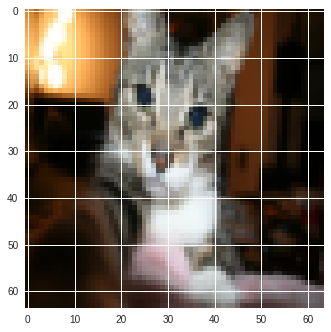

In [ ]:

index = 25
example = X_train[index]
plt.imshow(X_train[index])
print ("y = " + str(y_train[:, index]) + ", it's a '" + classes[np.squeeze(y_train[:, index])].decode("utf-8") +  "' picture.")

Na regressão logística aplicada a redes neurais, convenciona-se remodelar imagens de forma (num_px, num_px, 3) em uma matriz numpy de forma (num_px ∗ num_px ∗. Desta forma, o conjunto de dados de treinamento e teste são uma matriz numpy cujas colunas representam uma imagem achatada. 

Para cada coluna m_train deve haver uma correspondente m_test).

In [ ]:
train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 50)
train_set_y shape: (1, 50)
test_set_x_flatten shape: (209, 1)
test_set_y shape: (1, 50)
sanity check after reshaping: [158 104  83 161 106]


Padronização do conjunto de dados: 

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## dado que o range de valores possível pra um pixél vai de 0-255 
## escalonamos os valores entre 0-1
## esse processo torna nosso modelo menos variante a pequenas alterações.
x_train = train_set_x
x_test = test_set_x


model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

# reduz o parâmetro de learning rate se não houver 
# melhoras em determinado número de epocas
# útil para encontrar o mínimo global.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

batch_size = 32
epochs = 10

history = model.fit(x_train,
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_split=0.2,
                        verbose = 1,
                        callbacks=[learning_rate_reduction])

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

ValueError: ignored

Devido aos erros de saída com a biblioteca Tensorflow (como pode ser visto acima), uma nova tentativa com Pytorch será executada abaixo:

Importação das bibliotecas:

In [ ]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

Carregamento e leitura dos dados:

In [ ]:
train_file = h5py.File('/content/train_catvnoncat.h5', 'r')
test_file = h5py.File('/content/test_catvnoncat.h5', 'r')

Checagem do Dataset:

In [ ]:
print('Dataset contains these objects: ', end = '')
for key in train_file.keys():
    print(key, end = ', ')

Dataset contains these objects: list_classes, train_set_x, train_set_y, 

Separação dos dados de treino e teste:

In [ ]:
# Load training data in numpy
X_train = np.array(train_file['train_set_x'][:])
y_train = np.array(train_file['train_set_y'][:])

# Load development data in numpy
X_test = np.array(test_file['test_set_x'][:])
y_test = np.array(test_file['test_set_y'][:])

Comando para visualização de algumas imagens do dataset, bem como seu tamanho e dimensão dos dados de treino e teste: 



Visualização de algumas imagens do dataset:
Dimensões de cada imagem: (64, 64, 3)
Temos 209 imagens de treinamento e 50 imagens de teste


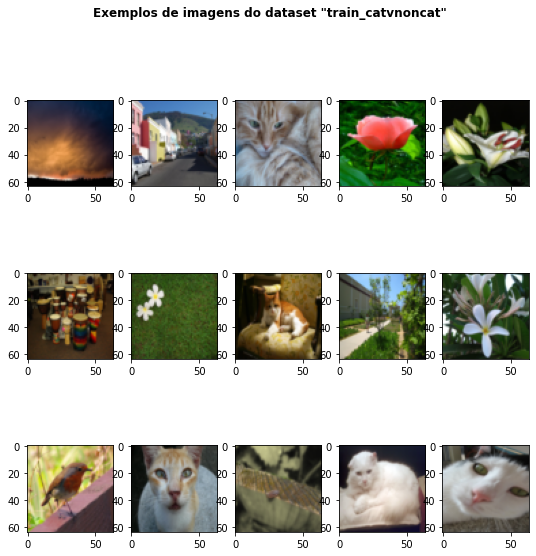

In [ ]:

print('\n\nVisualização de algumas imagens do dataset:')
n_rows = 3
n_cols = 5

f, axarr = plt.subplots(n_rows, n_cols, figsize = (9,9))
idx = 0

for i in range(n_rows):
    for j in range(n_cols):
        axarr[i,j].imshow(X_train[idx])
        idx += 1
plt.suptitle('Exemplos de imagens do dataset "train_catvnoncat"', fontweight='bold')

print('Dimensões de cada imagem:', X_train[0].shape)
print(f'Temos {X_train.shape[0]} imagens de treinamento e {X_test.shape[0]} imagens de teste')

In [ ]:
print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape, sep='\n')

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [ ]:
X_train[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

Linearização para uso na MLP

In [ ]:

X_trainMLP = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_testMLP = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

print(X_trainMLP.shape,
      X_testMLP.shape)

(209, 12288) (50, 12288)


Criação do transformador para noramlização

In [ ]:

from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

#Normalização das características
X_trainMLP = norm.fit_transform(X_trainMLP)
X_testMLP = norm.fit_transform(X_testMLP)

In [ ]:
from torch.autograd import Variable
from torch import Tensor

In [ ]:

X_trainMLP = Variable(Tensor(X_trainMLP).float())
X_testMLP = Variable(Tensor(X_testMLP).float())
y_trainMLP = Variable(Tensor(y_train).long())
y_testMLP = Variable(Tensor(y_test).long())

Conferência das dimensões da entrada na camada inicial da rede

In [ ]:

X_trainMLP.shape[1]

12288

In [ ]:
import torch
import torch.nn.functional as F

Criação da classe de Rede Neural Artificial MLP

In [ ]:

class FcNet(torch.nn.Module):

  def __init__(self):
    super(FcNet, self).__init__()

    # 12288 => X_trainMLP.shape[1]
    self.fc1 = torch.nn.Linear(12288, 100)
    self.fc2 = torch.nn.Linear(100, 2)
    self.output = torch.nn.Softmax(dim=1)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

Chama-se a classe para criação da rede

In [ ]:

model = FcNet()

#Conferência da arquitetura da rede
print(model)

FcNet(
  (fc1): Linear(in_features=12288, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (output): Softmax(dim=1)
)


A perda de entropia cruzada é adequada para problemas de classificação. Assim, é necessário executar os comandos abaixo:



In [ ]:

criterion = torch.nn.CrossEntropyLoss()

# Otimização de parâmentros:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

NUM_EPOCHS = 1000

Comandos para execução da rede neural:

In [ ]:

for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = model(X_trainMLP)
    loss = criterion(out, y_trainMLP)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.704819
At epoch 100 the loss is 0.679255
At epoch 200 the loss is 0.666408
At epoch 300 the loss is 0.631987
At epoch 400 the loss is 0.603616
At epoch 500 the loss is 0.586012
At epoch 600 the loss is 0.572221
At epoch 700 the loss is 0.560413
At epoch 800 the loss is 0.550037
At epoch 900 the loss is 0.540566


Executando predições no conjunto de teste. Cada predição é composta por um par (predição para cada classe)

In [ ]:

predict_out = model(X_testMLP)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

A fim de acaviar-se a Rede Neural, printa-se a matriz de confusão e classification report:

In [ ]:


#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_testMLP.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_testMLP.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[13  4]
 [ 7 26]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.87      0.79      0.83        33

    accuracy                           0.78        50
   macro avg       0.76      0.78      0.76        50
weighted avg       0.79      0.78      0.78        50



Comandos para visualização e análise da imagem 23 do dataset:

Há um gato na imagem


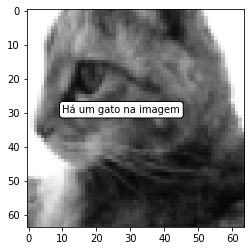

In [ ]:
#Imagem analisada
idx = 23

#Análise do resultado
if predict_y[idx] == 1:
  analise = 'Há um gato na imagem'
else:
  analise = 'Não há um gato na imagem'

#Geração do gráfico
plt.imshow(X_test[idx])
plt.annotate(analise, (10,30),
             bbox=dict(boxstyle="round", fc="w"))
  
print(analise)

Comandos para visualização e análise da imagem 39 do dataset:

Não há um gato na imagem


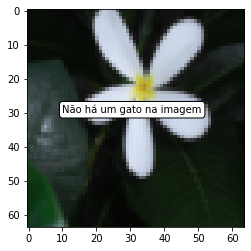

In [ ]:
#Imagem analisada
idx = 39

#Análise do resultado
if predict_y[idx] == 1:
  analise = 'Há um gato na imagem'
else:
  analise = 'Não há um gato na imagem'

#Geração do gráfico
plt.imshow(X_test[idx])
plt.annotate(analise, (10,30),
             bbox=dict(boxstyle="round", fc="w"))

print(analise)


Comandos para anaálise da imagem aleatória do dataset:

Há um gato na imagem


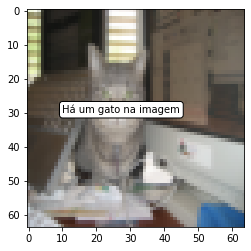

In [ ]:
#Imagem analisada
idx = np.random.randint(0,50)

#Análise do resultado
if predict_y[idx] == 1:
  analise = 'Há um gato na imagem'
else:
  analise = 'Não há um gato na imagem'


#Geração do gráfico
plt.imshow(X_test[idx])
plt.annotate(analise, (10,30),
             bbox=dict(boxstyle="round", fc="w"))

print(analise)

Comandos para anaálise da imagem aleatória do dataset:

Há um gato na imagem


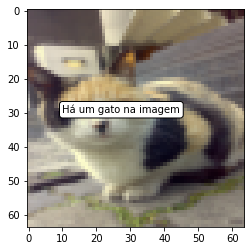

In [ ]:
#Imagem analisada
idx = np.random.randint(0,50)

#Análise do resultado
if predict_y[idx] == 1:
  analise = 'Há um gato na imagem'
else:
  analise = 'Não há um gato na imagem'


#Geração do gráfico
plt.imshow(X_test[idx])
plt.annotate(analise, (10,30),
             bbox=dict(boxstyle="round", fc="w"))

print(analise)

Bibliografia: 


https://qastack.com.br/datascience/15135/train-test-validation-set-splitting-in-sklearn

https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

https://www.dropbox.com/s/qucvn1ylb9zx82h/AM09%20%28Aprendizado%20de%20Comit%C3%AAs%29.pptx?dl=0

https://www.upgrad.com/blog/bagging-vs-boosting/

https://www.tutorialspoint.com/scikit_learn/scikit_learn_support_vector_machines.htm

http://www.each.usp.br/petsi/jornal/?p=2684

https://sites.icmc.usp.br/andre/research/neural/

https://www.deeplearningbook.com.br/introducao-as-redes-neurais-convolucionais/

https://medium.com/ensina-ai/rede-neural-perceptron-multicamadas-f9de8471f1a9

https://datascience-enthusiast.com/DL/Logistic-Regression-with-a-Neural-Network-mindset.html